<a href="https://colab.research.google.com/github/etorres14/kaggle_competition_housing_price_prediction/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House_Price_Prediction Kaggle Lab

### Edward Torres

--- 

## Objetive
Create a model to predict housing prices based on features in dataset.

## Import dependencies/data

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

id = test.Id

## Data Inspection/Cleaning
---

First I want to get an idea of what my data looks like. I want to pay attention to data type, missing data, and descriptions of my numerical data.

In [ ]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Here I want to identify which columns are missing the most aount of data

pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


GarageYrBlt has missing data, but I want to get an idea of why that is. I don't want to just assume that whoever entered the data simply forgot. From the code below I realize that the Garage year built is missing because there is no garage. 

In [ ]:
df[df.GarageArea == 0][["GarageYrBlt", "GarageCars","GarageArea"]]

,GarageYrBlt,GarageCars,GarageArea
39,NaN,0,0
48,NaN,0,0
78,NaN,0,0
88,NaN,0,0
89,NaN,0,0
...,...,...,...
1349,NaN,0,0
1407,NaN,0,0
1449,NaN,0,0
1450,NaN,0,0


In [ ]:
test.LotFrontage.min()

21.0

In [ ]:
## For columns (MasVnrArea, GarageYrBlt, LotFrontage) I will fill the na with 0's
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["LotFrontage"] = df["LotFrontage"].fillna(df.LotFrontage.mean())

test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
test["LotFrontage"] = test["LotFrontage"].fillna(df.LotFrontage.mean())

In [ ]:
## Checking for range, means, possbile skewness, and missing values in numeric data columns. 

df.describe().T.sort_values("count",ascending=False)[["count","mean","min","50%","max"]]

,count,mean,min,50%,max
Id,1460.0,730.500000,1.0,730.500000,1460.0
WoodDeckSF,1460.0,94.244521,0.0,0.000000,857.0
BedroomAbvGr,1460.0,2.866438,0.0,3.000000,8.0
KitchenAbvGr,1460.0,1.046575,0.0,1.000000,3.0
TotRmsAbvGrd,1460.0,6.517808,2.0,6.000000,14.0
Fireplaces,1460.0,0.613014,0.0,1.000000,3.0
GarageYrBlt,1460.0,1868.739726,0.0,1977.000000,2010.0
GarageCars,1460.0,1.767123,0.0,2.000000,4.0
GarageArea,1460.0,472.980137,0.0,480.000000,1418.0
OpenPorchSF,1460.0,46.660274,0.0,25.000000,547.0


From the info I gathered on my numeric data, I saw that LotArea could possibly have outliers. I want to verify this and fix it.

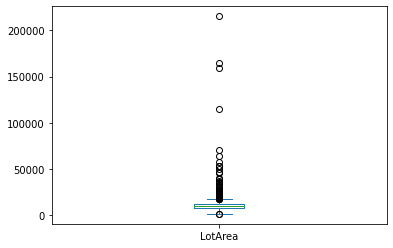

In [ ]:
df["LotArea"].plot.box();

In [ ]:
#https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

outlier_treatment(df.LotArea)

(1481.5, 17673.5)

In [ ]:
# The outliers are so far off from my range. Here I decide to drop the rows containing those outliers 
# This is because I wouldn't be a lot of data.

df = df[df.LotArea < 20000]

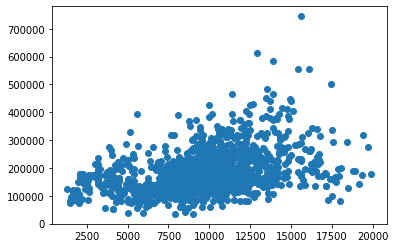

In [ ]:
plt.scatter(df.LotArea,df.SalePrice)

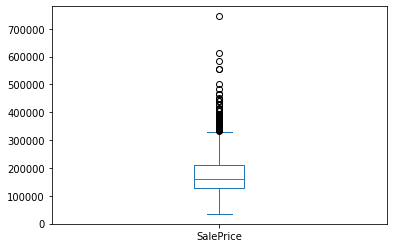

In [ ]:
df.SalePrice.plot.box();

In [ ]:
#df[df.SalePrice > 350000].shape
df = df[df.SalePrice < 350000]

## Working with Numeric Features with High Correlation to SalePrice
---

The first features I want to add to my model are those that are highly correlated to SalePrice.

In [ ]:
df.corr().SalePrice

Id              -0.013887
MSSubClass      -0.055485
LotFrontage      0.336275
LotArea          0.389866
OverallQual      0.801224
OverallCond     -0.057016
YearBuilt        0.581860
YearRemodAdd     0.553179
MasVnrArea       0.371129
BsmtFinSF1       0.313468
BsmtFinSF2      -0.001780
BsmtUnfSF        0.227450
TotalBsmtSF      0.587871
1stFlrSF         0.555525
2ndFlrSF         0.327834
LowQualFinSF    -0.065355
GrLivArea        0.697788
BsmtFullBath     0.200733
BsmtHalfBath    -0.028332
FullBath         0.592199
HalfBath         0.287866
BedroomAbvGr     0.210582
KitchenAbvGr    -0.148152
TotRmsAbvGrd     0.488090
Fireplaces       0.447893
GarageYrBlt      0.304532
GarageCars       0.640121
GarageArea       0.629699
WoodDeckSF       0.301346
OpenPorchSF      0.336608
EnclosedPorch   -0.153961
3SsnPorch        0.030178
ScreenPorch      0.108873
PoolArea         0.046140
MiscVal         -0.014430
MoSold           0.072545
YrSold          -0.028778
SalePrice        1.000000
Name: SalePr

In [ ]:
df.corr().SalePrice > .4

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces        True
GarageYrBlt      False
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
Name: SalePrice, dtype: bool

Here I am creating a seperate dataframe containing only certain features that have a high correlation to Sale Price

In [ ]:
high_corr_cols = ["LotFrontage","Fireplaces","OverallQual", "TotalBsmtSF", "1stFlrSF", "YearBuilt", "YearRemodAdd", 
                  "GrLivArea", "TotRmsAbvGrd", "GarageCars", "GarageArea", "LotArea","SalePrice"]

In [ ]:
df_numerics = df[high_corr_cols]

In [ ]:
df_numerics.describe()

,LotFrontage,Fireplaces,OverallQual,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,LotArea,SalePrice
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,68.559405,0.565441,5.990441,1015.965441,1121.386765,1970.367647,1984.176471,1463.305147,6.402941,1.711765,456.559559,9238.431618,169735.621324
std,18.935605,0.619867,1.286963,379.061961,335.341084,30.117261,20.630383,459.839239,1.532860,0.727375,203.253495,3296.225247,59920.710904
min,21.000000,0.000000,1.000000,0.000000,334.000000,1872.000000,1950.000000,334.000000,2.000000,0.000000,0.000000,1300.000000,34900.000000
25%,60.000000,0.000000,5.000000,784.000000,864.750000,1953.000000,1966.000000,1114.000000,5.000000,1.000000,308.000000,7347.500000,128425.000000
50%,70.049958,0.000000,6.000000,970.000000,1061.500000,1972.000000,1992.000000,1429.500000,6.000000,2.000000,469.000000,9202.000000,158000.000000
75%,78.000000,1.000000,7.000000,1244.500000,1337.000000,2000.000000,2003.000000,1724.000000,7.000000,2.000000,573.250000,11125.750000,201975.000000
max,182.000000,3.000000,10.000000,3206.000000,2898.000000,2009.000000,2010.000000,3493.000000,14.000000,4.000000,1390.000000,19900.000000,348000.000000


I want to take a look at the distribution of my features and also a scatter plot with SalePrice to see if there is a linear relationship between them.

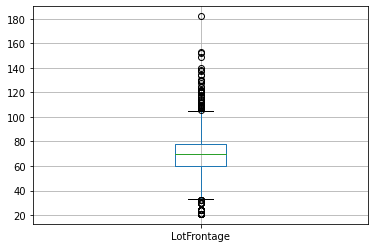

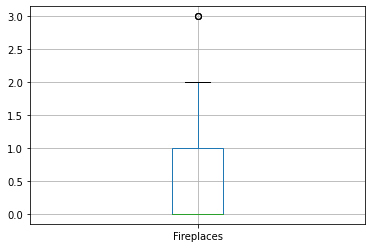

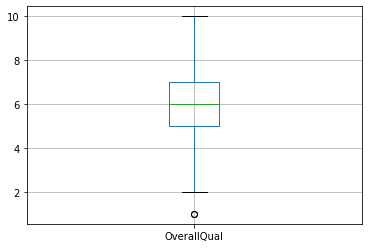

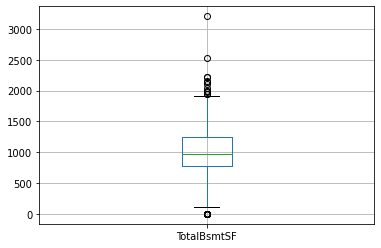

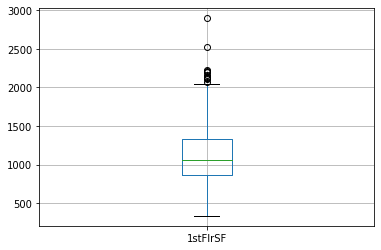

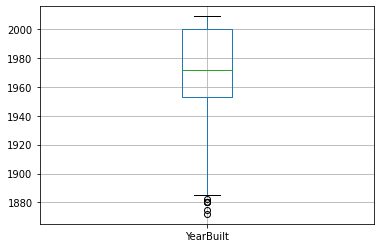

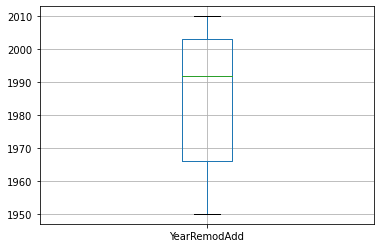

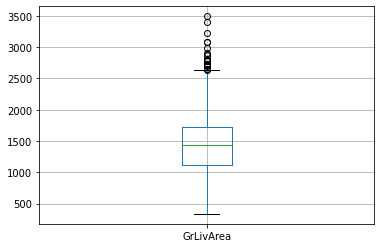

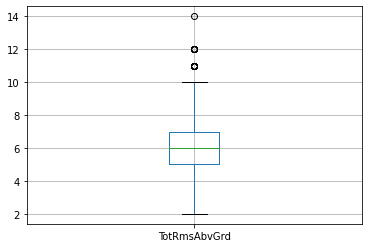

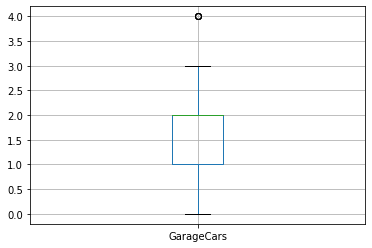

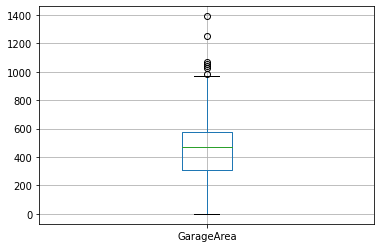

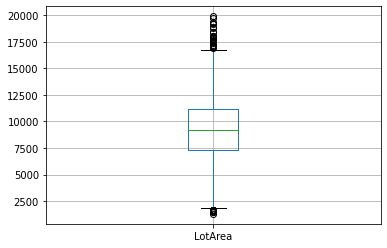

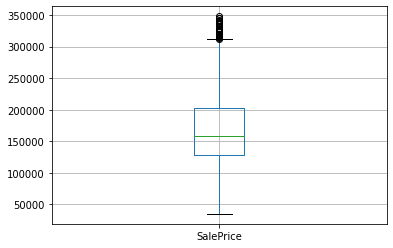

In [ ]:
import matplotlib.pyplot as plt

for column in df_numerics:
    plt.figure()
    df.boxplot([column])

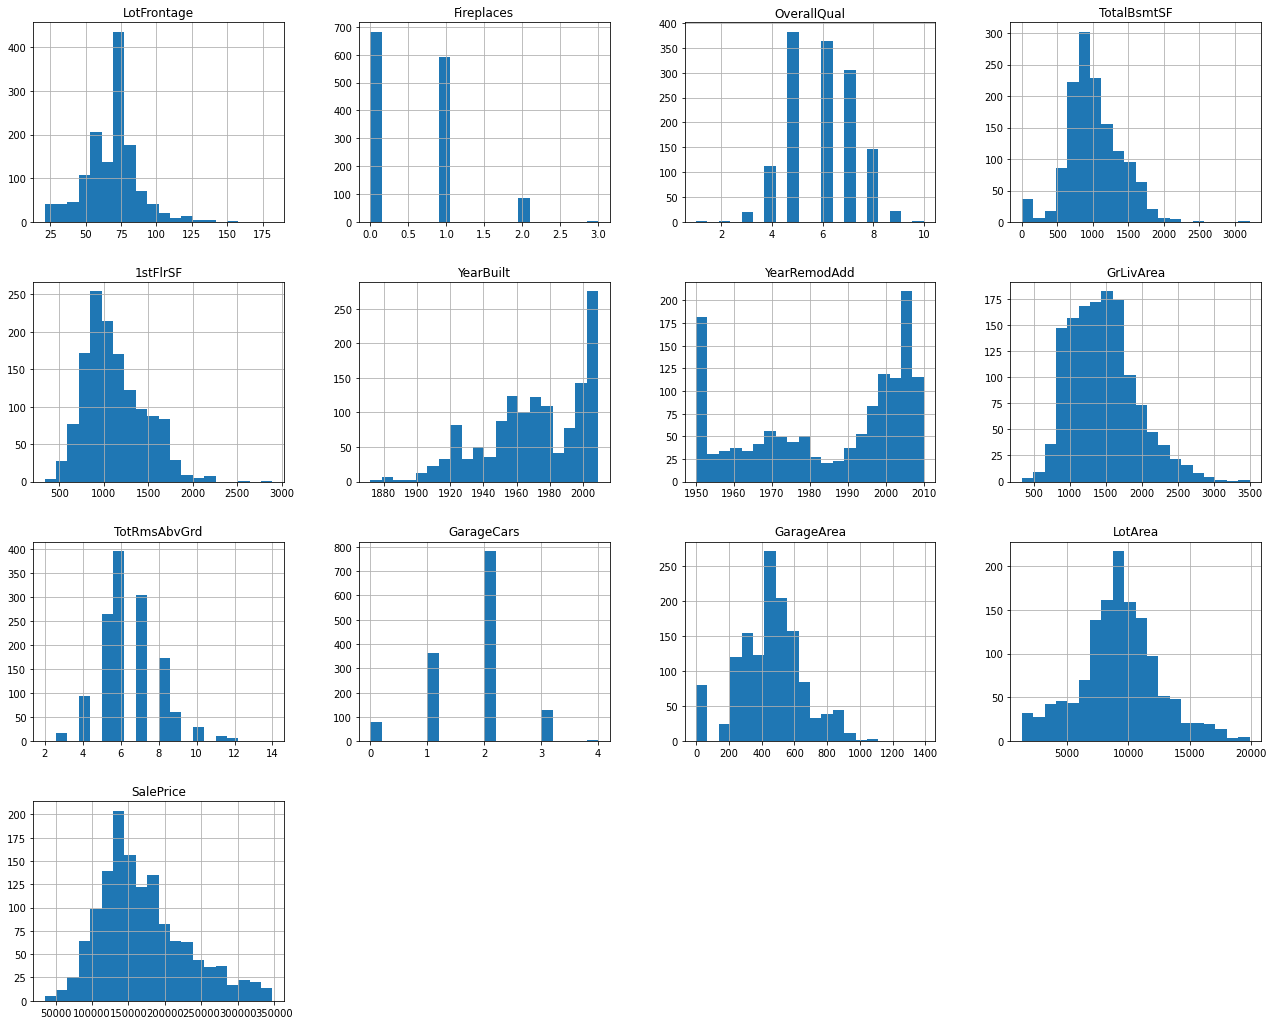

In [ ]:
df_numerics.hist(bins=20,figsize=(22,18));

In [ ]:
df_numerics.columns

Index(['LotFrontage', 'Fireplaces', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
       'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'LotArea', 'SalePrice'],
      dtype='object')

In [ ]:
#df_numerics[["LotArea","YearRemodAdd","GrLivArea","GarageArea","YearBuilt","1stFlrSF","TotalBsmtSF"]] = np.log(df_numerics[["LotArea","YearRemodAdd","GrLivArea","GarageArea","YearBuilt","1stFlrSF","TotalBsmtSF"]]+1)

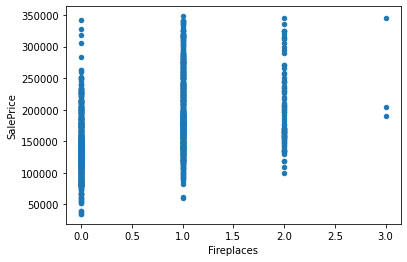

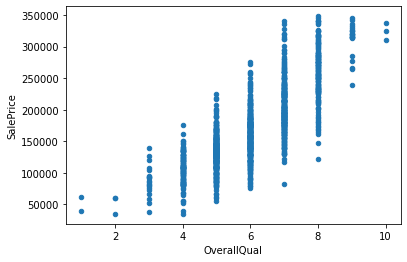

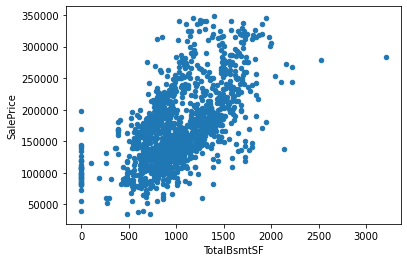

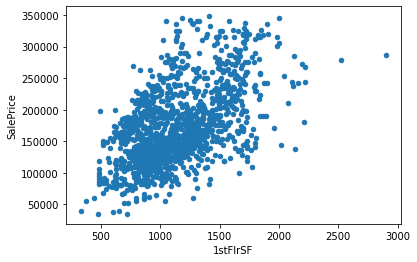

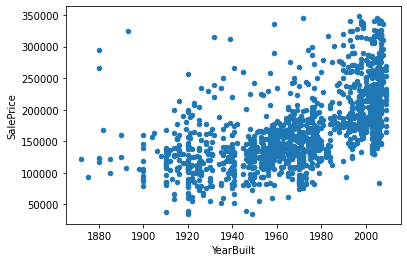

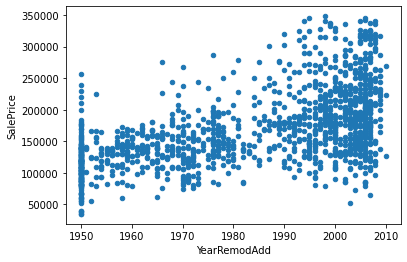

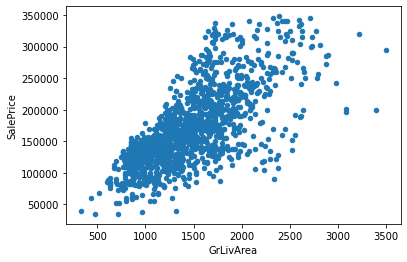

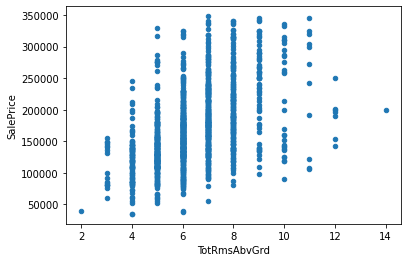

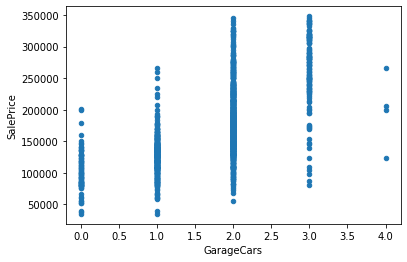

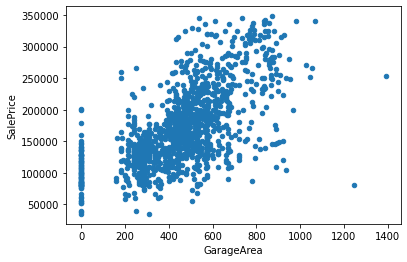

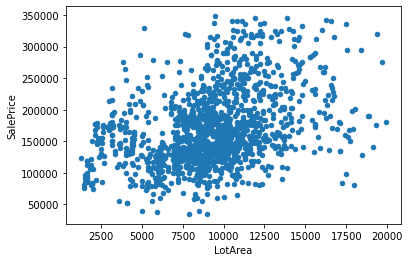

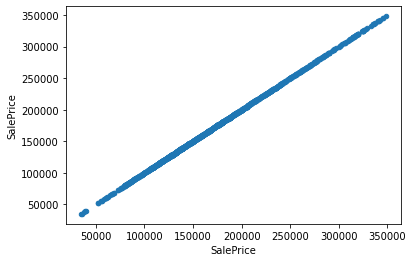

In [ ]:
for column in df_numerics.columns[1:]:
     df_numerics.plot(kind='scatter', x=column,y= "SalePrice")

In [ ]:
df_numerics.corr() > .7

,LotFrontage,Fireplaces,OverallQual,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,LotArea,SalePrice
LotFrontage,True,False,False,False,False,False,False,False,False,False,False,False,False
Fireplaces,False,True,False,False,False,False,False,False,False,False,False,False,False
OverallQual,False,False,True,False,False,False,False,False,False,False,False,False,True
TotalBsmtSF,False,False,False,True,True,False,False,False,False,False,False,False,False
1stFlrSF,False,False,False,True,True,False,False,False,False,False,False,False,False
YearBuilt,False,False,False,False,False,True,False,False,False,False,False,False,False
YearRemodAdd,False,False,False,False,False,False,True,False,False,False,False,False,False
GrLivArea,False,False,False,False,False,False,False,True,True,False,False,False,False
TotRmsAbvGrd,False,False,False,False,False,False,False,True,True,False,False,False,False
GarageCars,False,False,False,False,False,False,False,False,False,True,True,False,False


I removed 3 features to avoid colinearity. These features had a correaltion of over .7 with other features.

Looking at the p-values in my model helped me come to a descision on which to remove specifically

In [ ]:
df_numerics = df_numerics.drop(["GarageCars","TotRmsAbvGrd","1stFlrSF"],axis = 1)

Create Fireplaces

In [ ]:
def isFireplace(row):
  if row.Fireplaces > 0:
    return 1
  else:
    return 0

In [ ]:
df_numerics["Fireplace"] = df_numerics.apply(isFireplace, axis = "columns")
test["Fireplace"] = test.apply(isFireplace, axis ="columns")

## Initial Models
---

In [ ]:
X = df_numerics.drop(["SalePrice","Fireplaces"],axis =1)
y = df_numerics.SalePrice

#### sklearn OLS Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=36)

#create and train model
mod = LinearRegression()

mod.fit(X_train, y_train)

y_pred = mod.predict(X_test)


Model validation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 17869.71626771394
RMSE: 24051.295679752093
r2_score: 0.8585707336552588


In [ ]:
#Cross Validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(mod, X,y, cv=10)
print(f'Scores: {scores}')
print(f'Average Score: {scores.mean()}')
print(f'STD of Scores: {scores.std()}')

Scores: [0.85098559 0.83943646 0.87753351 0.8690964  0.81520731 0.86347289
 0.85924566 0.84598628 0.81828142 0.83263525]
Average Score: 0.8471880759064678
STD of Scores: 0.019893472348873422


### SGDRegressor Models

In [ ]:
from sklearn.linear_model import SGDRegressor

#### Huber


In [ ]:
huber_mod = SGDRegressor(loss='huber',penalty=None,tol = None,alpha=0.000001,max_iter=1000000,epsilon=1)

huber_mod.fit(X_train, y_train)

y_pred = huber_mod.predict(X_test)

Model Validation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 20492.539915434296
RMSE: 27334.04847937778
r2_score: 0.8173287274156396


#### MAE


In [ ]:
mae_mod = SGDRegressor(loss='epsilon_insensitive',penalty=None,tol = None, alpha=0.00001,max_iter=1000000, epsilon=0)

mae_mod.fit(X_train, y_train)

y_pred = mae_mod.predict(X_test)

Model Evalution

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 20856.038913835353
RMSE: 27440.457056404117
r2_score: 0.8159037189811374


### Stats OLS model

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The .summary() method was really helpful when I wanted to figure out which features I should try excluding to improve my model. For this, I look at the p-values and identify the feature with the highest one.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=36)

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              5474.
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        08:08:55   Log-Likelihood:                         -11801.
No. Observations:                1020   AIC:                                  2.362e+04
Df Residuals:                    1011   BIC:                                  2.366e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Model Evaluation

In [ ]:
y_pred = results.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 20013.53913724792
RMSE: 26621.21726342619
r2_score: 0.8138413887186252


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X, y)

y_pred = regr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 6062.658470588236
RMSE: 8364.699730306385
r2_score: 0.9816207399776425


In [ ]:
#Cross Validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(regr, X,y, cv=10)
print(f'Scores: {scores}')
print(f'Average Score: {scores.mean()}')
print(f'STD of Scores: {scores.std()}')

Scores: [0.82656446 0.83585646 0.88731337 0.90080675 0.83185215 0.88508134
 0.88176357 0.8833985  0.84994559 0.79053221]
Average Score: 0.8573114391988476
STD of Scores: 0.03377744298172966


## Categorical Encoding
---

### Nonimal Data


In [ ]:
#function to generate dummy variables
def encode(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    return(dummies) 

In [ ]:
# Checking to see if there could possibly be a significant difference in SalePrice based on SaleType
df.groupby('SaleType').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,41.0,139742.682927,43878.875272,60000.0,112000.0,137500.0,157900.00,287000.0
CWD,4.0,210600.000000,86421.486526,136000.0,152500.0,188750.0,246850.00,328900.0
Con,2.0,269600.000000,76933.217793,215200.0,242400.0,269600.0,296800.00,324000.0
ConLD,9.0,138780.888889,53876.560647,79900.0,85000.0,140000.0,160000.00,235128.0
ConLI,4.0,137500.000000,42130.748866,110000.0,113750.0,120000.0,143750.00,200000.0
ConLw,5.0,143700.000000,67291.901444,60000.0,95000.0,144000.0,207500.00,212000.0
New,90.0,227989.222222,55613.936195,113000.0,181350.5,223000.0,265640.25,345000.0
Oth,3.0,119850.000000,28441.035495,93500.0,104775.0,116050.0,133025.00,150000.0
WD,1202.0,166666.628120,58047.004191,34900.0,127625.0,155000.0,196375.00,348000.0


In [ ]:
#Generate dummy variables from both data sets. (test and train)
sale_type_dummies = encode(df,"SaleType")

sale_type_test_dummies = encode(test,"SaleType")

In [ ]:
df.groupby('CentralAir').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,93.0,103398.784946,38406.085411,34900.0,82000.0,98000.0,126000.0,265979.0
Y,1267.0,174604.860300,58310.074900,52000.0,132500.0,163500.0,206950.0,348000.0


In [ ]:
CentralAir_dummies = encode(df,"CentralAir")
CentralAir_dummies = CentralAir_dummies.drop(["CentralAir_N"], axis=1)
CentralAir_dummies = CentralAir_dummies.rename(columns={"CentralAir_Y": "CentralAir"})

CentralAir_test_dummies = encode(test,"CentralAir")
CentralAir__test_dummies = CentralAir_test_dummies.drop(["CentralAir_N"], axis=1)
CentralAir_test_dummies = CentralAir_test_dummies.rename(columns={"CentralAir_Y": "CentralAir"})

In [ ]:
df.groupby('MSZoning').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),10.0,74528.000000,33791.092031,34900.0,43998.25,74700.0,98332.0,133900.0
FV,64.0,211563.062500,48881.854291,144152.0,173933.25,202925.0,249775.0,340000.0
RH,16.0,131558.375000,35714.118435,76000.0,106150.00,136500.0,148608.5,200000.0
RL,1054.0,178159.986717,58630.628748,39300.0,135787.50,169000.0,212675.0,348000.0
RM,216.0,123470.226852,38380.663012,37900.0,100000.00,120250.0,140000.0,325000.0


In [ ]:
MSZonings_dummies = encode(df, "MSZoning")

MSZonings_test_dummies = encode(test, "MSZoning")

In [ ]:
df.groupby('Street').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Street,,,,,,,,
Grvl,4.0,91373.250000,28531.752994,55993.0,74748.25,95500.0,112125.0,118500.0
Pave,1356.0,169966.778761,59842.356213,34900.0,128500.00,158250.0,202500.0,348000.0


In [ ]:
streets_dummies = encode(df, "Street")

streets_test_dummies = encode(test, "Street")

In [ ]:
df.groupby('SaleCondition').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,97.0,138321.536082,56508.323637,34900.0,102776.00,129900.0,160000.00,328900.0
AdjLand,4.0,104125.000000,26135.464411,81000.0,81750.00,104000.0,126375.00,127500.0
Alloca,10.0,144880.500000,62844.951098,55993.0,111433.75,130958.5,172584.25,274970.0
Family,20.0,149600.000000,47820.002421,82500.0,115500.00,140500.0,170250.00,259000.0
Normal,1137.0,168598.762533,57647.814294,39300.0,129000.00,157000.0,198500.00,348000.0
Partial,92.0,226838.673913,56253.422016,113000.0,180766.75,223000.0,264920.75,345000.0


In [ ]:
saleCondition_dummies = encode(df, "SaleCondition")

saleCondition_test_dummies = encode(test, "SaleCondition")

In [ ]:
df.groupby('HouseStyle').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
HouseStyle,,,,,,,,
1.5Fin,147.0,137299.510204,43907.153278,37900.0,112500.0,130500.0,152950.0,316600.0
1.5Unf,14.0,110150.000000,19036.473090,76000.0,98175.0,111250.0,120500.0,139400.0
1Story,672.0,164619.700893,59244.745291,34900.0,125000.0,150000.0,196000.0,337500.0
2.5Fin,7.0,183571.428571,62588.889171,104000.0,149000.0,191000.0,198500.0,295000.0
2.5Unf,11.0,157354.545455,63934.128032,101000.0,125000.0,133900.0,163500.0,325000.0
2Story,408.0,195640.936275,60762.430973,40000.0,155000.0,187250.0,231875.0,348000.0
SFoyer,37.0,135074.486486,30480.898192,75500.0,127500.0,135960.0,148000.0,206300.0
SLvl,64.0,166495.625000,38571.043949,91000.0,145000.0,164200.0,177250.0,345000.0


In [ ]:
HouseStyle_dummies = encode(df, "HouseStyle")

housStyle_test_dummies = encode(test, "HouseStyle")

In [ ]:
df.groupby('BldgType').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
1Fam,1126.0,172976.987567,61178.725002,34900.0,129500.0,162000.0,208800.00,348000.0
2fmCon,28.0,122837.500000,30367.443047,55000.0,103437.5,123750.0,137750.00,200000.0
Duplex,51.0,133355.607843,28077.732188,82000.0,118250.0,135960.0,145000.00,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.00,230000.0
TwnhsE,112.0,178424.741071,54957.704375,75500.0,143000.0,171825.0,203748.75,328900.0


In [ ]:
BuildingType_dummies = encode(df, "BldgType")

BuildingType_test_dummies = encode(test, "BldgType")

In [ ]:
df.groupby('Foundation').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Foundation,,,,,,,,
BrkTil,141.0,128109.907801,45202.354731,37900.0,102000.0,124900.0,145000.00,325000.0
CBlock,605.0,145924.813223,42707.646414,34900.0,120500.0,140000.0,165000.00,345000.0
PConc,582.0,207006.711340,57792.829049,78000.0,168625.0,198400.0,243250.00,348000.0
Slab,23.0,107033.695652,34943.396798,39300.0,88750.0,101800.0,118911.00,198500.0
Stone,6.0,165959.166667,78557.704413,102776.0,109625.0,126500.0,233734.25,266500.0
Wood,3.0,185666.666667,56695.090910,143000.0,153500.0,164000.0,207000.00,250000.0


In [ ]:
Foundation_dummies = encode(df, "Foundation")

Foundation_test_dummies = encode(test, "Foundation")

In [ ]:
df.groupby('Utilities').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Utilities,,,,,,,,
AllPub,1359.0,169759.341428,59936.381209,34900.0,128350.0,158000.0,202150.0,348000.0
NoSeWa,1.0,137500.000000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0


In [ ]:
utilities_dummies = encode(df,"Utilities")

utilities_test_dummies = encode(test,"Utilities")

In [ ]:
df.groupby('Neighborhood').SalePrice.describe()


,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.0,191000.0,213490.0,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.0,137500.0,144250.0,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.0,106000.0,118000.0,125000.0
BrkSide,57.0,123103.070175,38473.366272,39300.0,100000.0,121600.0,140200.0,214500.0
ClearCr,15.0,194195.466667,47588.656748,130000.0,167250.0,190000.0,205750.0,328000.0
CollgCr,148.0,195175.851351,45660.170260,110000.0,151625.0,195950.0,224900.0,313000.0
Crawfor,44.0,198423.568182,58140.237483,90350.0,156475.0,189325.0,234250.0,335000.0
Edwards,97.0,126723.917526,42961.317377,58500.0,100000.0,119000.0,140000.0,320000.0
Gilbert,73.0,190275.904110,28132.069746,141000.0,174000.0,181000.0,194500.0,320000.0


In [ ]:
neighborhood_dummies = encode(df, "Neighborhood")

neighborhood_test_dummies = encode(test, "Neighborhood")

### Ordinal Data

The following columns have ordinal data. Here I look to replace the ranked categorical data with integer values. 

In [ ]:
df.groupby('ExterCond').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
ExterCond,,,,,,,,
Ex,3.0,201333.333333,109235.220205,118000.0,139500.0,161000.0,243000.0,325000.0
Fa,27.0,102135.703704,40782.976312,39300.0,64000.0,89500.0,138500.0,169500.0
Gd,134.0,158392.873134,51234.527371,68400.0,127125.0,145000.0,177100.0,335000.0
Po,1.0,76500.000000,NaN,76500.0,76500.0,76500.0,76500.0,76500.0
TA,1195.0,172533.586611,60022.192077,34900.0,129500.0,162000.0,206450.0,348000.0


In [ ]:
# create a dictionary pairs data with an integer.
scale_mapper = {"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5}

#replacing data with integers
df["ExterCond"] = df["ExterCond"].replace(scale_mapper)

test["ExterCond"] = test["ExterCond"].replace(scale_mapper)

In [ ]:
df.groupby('ExterQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
ExterQual,,,,,,,,
Ex,23.0,286484.304348,51610.966178,176500.0,266250.0,311872.0,319950.0,345000.0
Fa,14.0,87985.214286,39826.918794,39300.0,60250.0,82250.0,102000.0,200000.0
Gd,452.0,220298.856195,52508.075106,52000.0,182675.0,214000.0,256075.0,348000.0
TA,871.0,141727.244546,38816.861082,34900.0,118000.0,139000.0,163000.0,342643.0


In [ ]:
scale_mapper = {"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5}
df["ExterQual"] = df["ExterQual"].replace(scale_mapper)

test["ExterQual"] = test["ExterQual"].replace(scale_mapper)

In [ ]:
df.groupby('KitchenQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,61.0,264797.262295,62008.933738,86000.0,239000.0,275000.0,315000.0,345000.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
Gd,553.0,204816.251356,53382.740093,79000.0,169990.0,197500.0,236000.0,348000.0
TA,707.0,137634.203678,35813.466881,34900.0,115000.0,135750.0,158000.0,289000.0


In [ ]:
scale_mapper = {"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5}
df["KitchenQual"] = df["KitchenQual"].replace(scale_mapper)

test["KitchenQual"] = test["KitchenQual"].replace(scale_mapper)

**Putting the data all together**

In [ ]:
df_added_features = pd.concat([df_numerics,MSZonings_dummies, neighborhood_dummies,sale_type_dummies,df.ExterQual,df.KitchenQual,BuildingType_dummies,HouseStyle_dummies,saleCondition_dummies,Foundation_dummies], axis = 1)

## Updated Models
---

### OLS Linear Regression Model

In [ ]:
X = df_added_features.drop(["SalePrice"],axis =1)
y = df_added_features.SalePrice

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=36)

mod = LinearRegression()

mod.fit(X_train, y_train)

y_pred = mod.predict(X_test)


Model Validation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 16343.83659583887
RMSE: 21601.179560801935
r2_score: 0.8859179628669152


In [ ]:
#cross validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(mod, X,y, cv=10, )
print(scores)
print(scores.mean())
print(scores.std())

[0.89956374 0.88524803 0.89482631 0.86533875 0.86239129 0.86520525
 0.87479725 0.86864369 0.88189339 0.86234227]
0.8760249961163693
0.012990044803769972


#### Taking a look at our residuals: Checking for normality and heteroscadacity 

In [ ]:
residuals = y_train - mod.predict(X_train)

In [ ]:
# The mean of the residuals should be very close to zero.
np.mean(residuals)

-1.1063735548625974e-10

Residual Plots

With the Code below I can plot my residuals. These plots let me check for normality and heteroscadiscity.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


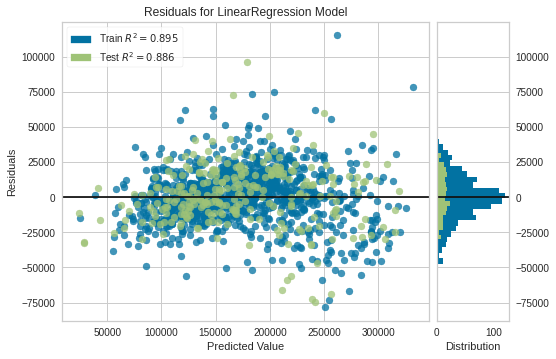

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(mod)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### SGDRegressor: Huber Model

In [ ]:
from sklearn.linear_model import SGDRegressor

#Split and traini model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=36)

#Create and train model
huber_mod = SGDRegressor(loss='huber',penalty=None,tol = None,alpha=0.000001,max_iter=500000, epsilon=1)

huber_mod.fit(X_train, y_train)

y_pred = huber_mod.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 18855.703772087505
RMSE: 25246.46577857921
r2_score: 0.8441655349960051


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


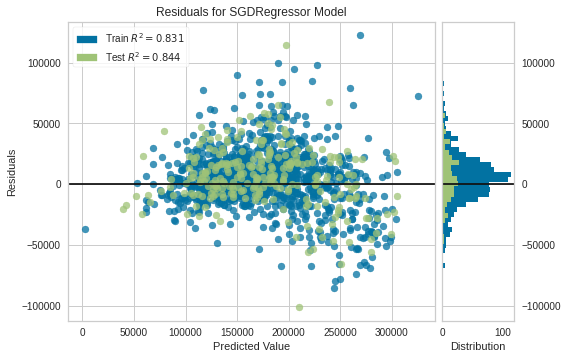

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(huber_mod)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

### sm.OLS model

Again the .summary() method was really helpful when I wanted to figure out which features I should try excluding to improve my model. For this, I look at the p-values and identify the feature with the highest one.

In [ ]:
#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=36)

#create and train model
model = sm.OLS(y_train, X_train)
results = model.fit()

y_pred = results.predict(X_test)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     118.9
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        18:55:26   Log-Likelihood:                -11509.
No. Observations:                1020   AIC:                         2.316e+04
Df Residuals:                     951   BIC:                         2.350e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage              35.97

model validation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 16428.154928454725
RMSE: 23375.542955905665
r2_score: 0.8564673426817694


### Random Forest Regressor

Initial Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X, y)

y_pred = regr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 6063.88519607843
RMSE: 8650.673653991707
r2_score: 0.9817037455772855


In [ ]:
#Cross Validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(regr, X,y, cv=10)
print(f'Scores: {scores}')
print(f'Average Score: {scores.mean()}')
print(f'STD of Scores: {scores.std()}')

Scores: [0.83785273 0.8499868  0.89318683 0.8942619  0.84444635 0.89918802
 0.88656052 0.89510056 0.88677156 0.79306457]
Average Score: 0.8680419835529808
STD of Scores: 0.033363855767851655


Tuning HyperParameters

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



Updated Random Forest Regressor Model

In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
randmf.fit( X_train, y_train) 

y_pred = randmf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
r2 = r2_score(y_test,y_pred)
print(f'r2_score: {r2}')

MAE: 15505.779362745097
RMSE: 21737.10261820294
r2_score: 0.8844777484253987


In [ ]:
#Cross Validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(randmf, X,y, cv=10)
print(f'Scores: {scores}')
print(f'Average Score: {scores.mean()}')
print(f'STD of Scores: {scores.std()}')

Scores: [0.88721334 0.87495604 0.87510869 0.8655574  0.84908706 0.90643474
 0.89408118 0.89462992 0.89651724 0.83771257]
Average Score: 0.8781298179749049
STD of Scores: 0.020982797008440315


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


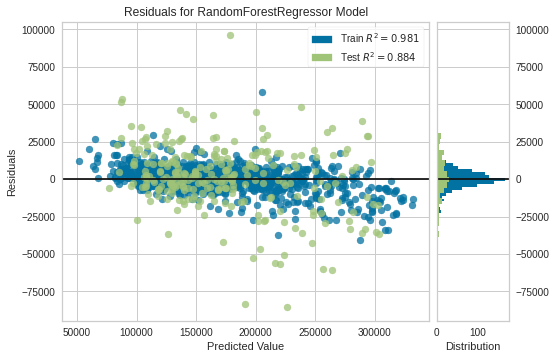

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(randmf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Get Predicted Values for Test data for Kaggle submission

[df_numerics,
MSZonings_dummies,
 neighborhood_dummies,
 sale_type_dummies,
 df.ExterQual,
 df.KitchenQual,
 BuildingType_dummies,
 HouseStyle_dummies,
 saleCondition_dummies,
 Foundation_dummies]

In [ ]:
test1 = test[["LotFrontage","Fireplaces","OverallQual", "TotalBsmtSF", "YearBuilt", "YearRemodAdd", "GrLivArea", "GarageArea", "LotArea","Fireplace"]]

In [ ]:
test = pd.concat([test1,MSZonings_test_dummies, neighborhood_test_dummies,sale_type_test_dummies,test.ExterQual, test.KitchenQual, BuildingType_test_dummies, housStyle_test_dummies, saleCondition_test_dummies, Foundation_test_dummies ], axis = 1)


In [ ]:
test = test.fillna(0)

In [ ]:
test["HouseStyle_2.5Fin"] = 0

In [ ]:
test = test[['LotFrontage', 'Fireplaces', 'OverallQual', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd', 'GrLivArea', 'GarageArea', 'LotArea',
       'Fireplace', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'ExterQual', 'KitchenQual', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood']]

In [ ]:
#test = test.drop("CentralAir_N", axis =1)

In [ ]:
test_pred = mod.predict(test)

In [ ]:
submission = pd.DataFrame({"Id": id, "SalePrice": test_pred})

In [ ]:
submission.to_csv("submission.csv", index = False)